In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd
import pickle
pd.set_option('display.max_columns', None)

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

from scipy import stats
import math

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
#import statsmodels.formula.api as smf

from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


# Preprocesado y modelado
plt.rcParams["figure.figsize"] = (10,8)

# librerías para crear el modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder  

from sklearn import tree

# para calcular las métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

# warnings
import warnings
warnings.filterwarnings('ignore')

# input

In [2]:
columnas = ["Customer_Number", 
            "Offer_Accepted", 
            "Reward", 
            "Mailer_Type", 
            "Income_Level", 
            "Bank_Accounts_Open",
            "Overdraft_Protection",
            "Credit_Rating",
            "Credit_Cards_Held",
            "Homes_Owned",
            "Household_Size",
            "Own_Your_Home",
            "AVG_Balance_Q1",
            "AVG_Balance_Q2",
            "AVG_Balance_Q3",
            "AVG_Balance_Q4",
            "Balance"
            ]

In [3]:
df = pd.read_csv('datos/creditcardmarketing.csv', header = None,
                 names=columnas)
df.head(1)

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,AVG_Balance_Q1,AVG_Balance_Q2,AVG_Balance_Q3,AVG_Balance_Q4,Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0


# EDA
1. ver que tengo en el df y los tipos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_Number       18000 non-null  int64  
 1   Offer_Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer_Type           18000 non-null  object 
 4   Income_Level          18000 non-null  object 
 5   Bank_Accounts_Open    18000 non-null  int64  
 6   Overdraft_Protection  18000 non-null  object 
 7   Credit_Rating         18000 non-null  object 
 8   Credit_Cards_Held     18000 non-null  int64  
 9   Homes_Owned           18000 non-null  int64  
 10  Household_Size        18000 non-null  int64  
 11  Own_Your_Home         18000 non-null  object 
 12  AVG_Balance_Q1        17976 non-null  float64
 13  AVG_Balance_Q2        17976 non-null  float64
 14  AVG_Balance_Q3        17976 non-null  float64
 15  AVG_Balance_Q4     

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Number,18000.0,9000.500000,5196.296758,1.00,4500.75,9000.5,13500.25,18000.00
Bank_Accounts_Open,18000.0,1.255778,0.472501,1.00,1.00,1.0,1.00,3.00
Credit_Cards_Held,18000.0,1.903500,0.797009,1.00,1.00,2.0,2.00,4.00
Homes_Owned,18000.0,1.203444,0.427341,1.00,1.00,1.0,1.00,3.00
Household_Size,18000.0,3.499056,1.114182,1.00,3.00,3.0,4.00,9.00
AVG_Balance_Q1,17976.0,940.515562,350.297837,48.25,787.50,1007.0,1153.25,3366.25
AVG_Balance_Q2,17976.0,910.450656,620.077060,0.00,392.75,772.0,1521.00,3450.00
AVG_Balance_Q3,17976.0,999.392190,457.402268,0.00,663.00,1032.0,1342.00,3421.00
AVG_Balance_Q4,17976.0,1042.033600,553.452599,0.00,633.00,945.5,1463.00,3823.00
Balance,17976.0,810.185803,559.001365,0.00,363.00,703.0,1212.00,4215.00


In [6]:
df.describe(include='object').T

,count,unique,top,freq
Offer_Accepted,18000,2,No,16977
Reward,18000,3,Air Miles,6061
Mailer_Type,18000,2,Postcard,9147
Income_Level,18000,3,Medium,9013
Overdraft_Protection,18000,2,No,15322
Credit_Rating,18000,3,High,6071
Own_Your_Home,18000,2,Yes,11655


- variables continuas:
    - `Offer_Accepted` -> booleana, es la variable respuesta
    - `Reward' -> categórica, son tres tipos: 
        - 'Air Miles'
        - 'Cash Back' 
        - 'Points'
    - `Mailer_Type`-> categórica, dos tipos:
        - 'Postcard' 
        - 'Letter'
    - `Income_Level` -> categórcia, dos tipos:
        - Medium
        - High
        - Low
    - `Overdraft_Protection` -> booleana
    - `Credit_Rating` -> categórica, tres variables:
        - Medium
        - High
        - Low
    - `Own_Your_Home`-> booleana
- variable numérica:
    - `Customer_Number` -> continua
    - `Bank_Accounts_Open` -> discreta
    - `Credit_Cards_Held` -> discreta
    - `Homes_Owned` -> discreta
    - `Household_Size` ->discreta
    - `AVG_Balance_Q1` -> continua
    - `AVG_Balance_Q2` -> continua
    - `AVG_Balance_Q3` -> continua
    - `AVG_Balance_Q4` -> continua
    - `Balance` -> continua

2. número de nulos en el dataset

In [7]:
df.isnull().sum() / df.shape[0]

Customer_Number         0.000000
Offer_Accepted          0.000000
Reward                  0.000000
Mailer_Type             0.000000
Income_Level            0.000000
Bank_Accounts_Open      0.000000
Overdraft_Protection    0.000000
Credit_Rating           0.000000
Credit_Cards_Held       0.000000
Homes_Owned             0.000000
Household_Size          0.000000
Own_Your_Home           0.000000
AVG_Balance_Q1          0.001333
AVG_Balance_Q2          0.001333
AVG_Balance_Q3          0.001333
AVG_Balance_Q4          0.001333
Balance                 0.001333
dtype: float64

3. check valores duplicados

In [8]:
df.duplicated().sum() / df.shape[0]

0.0

## variables continuas

In [9]:
import psutil
print(psutil.virtual_memory())

svmem(total=8589934592, available=2237169664, percent=74.0, used=3568844800, free=211730432, active=2043084800, inactive=1917059072, wired=1525760000)


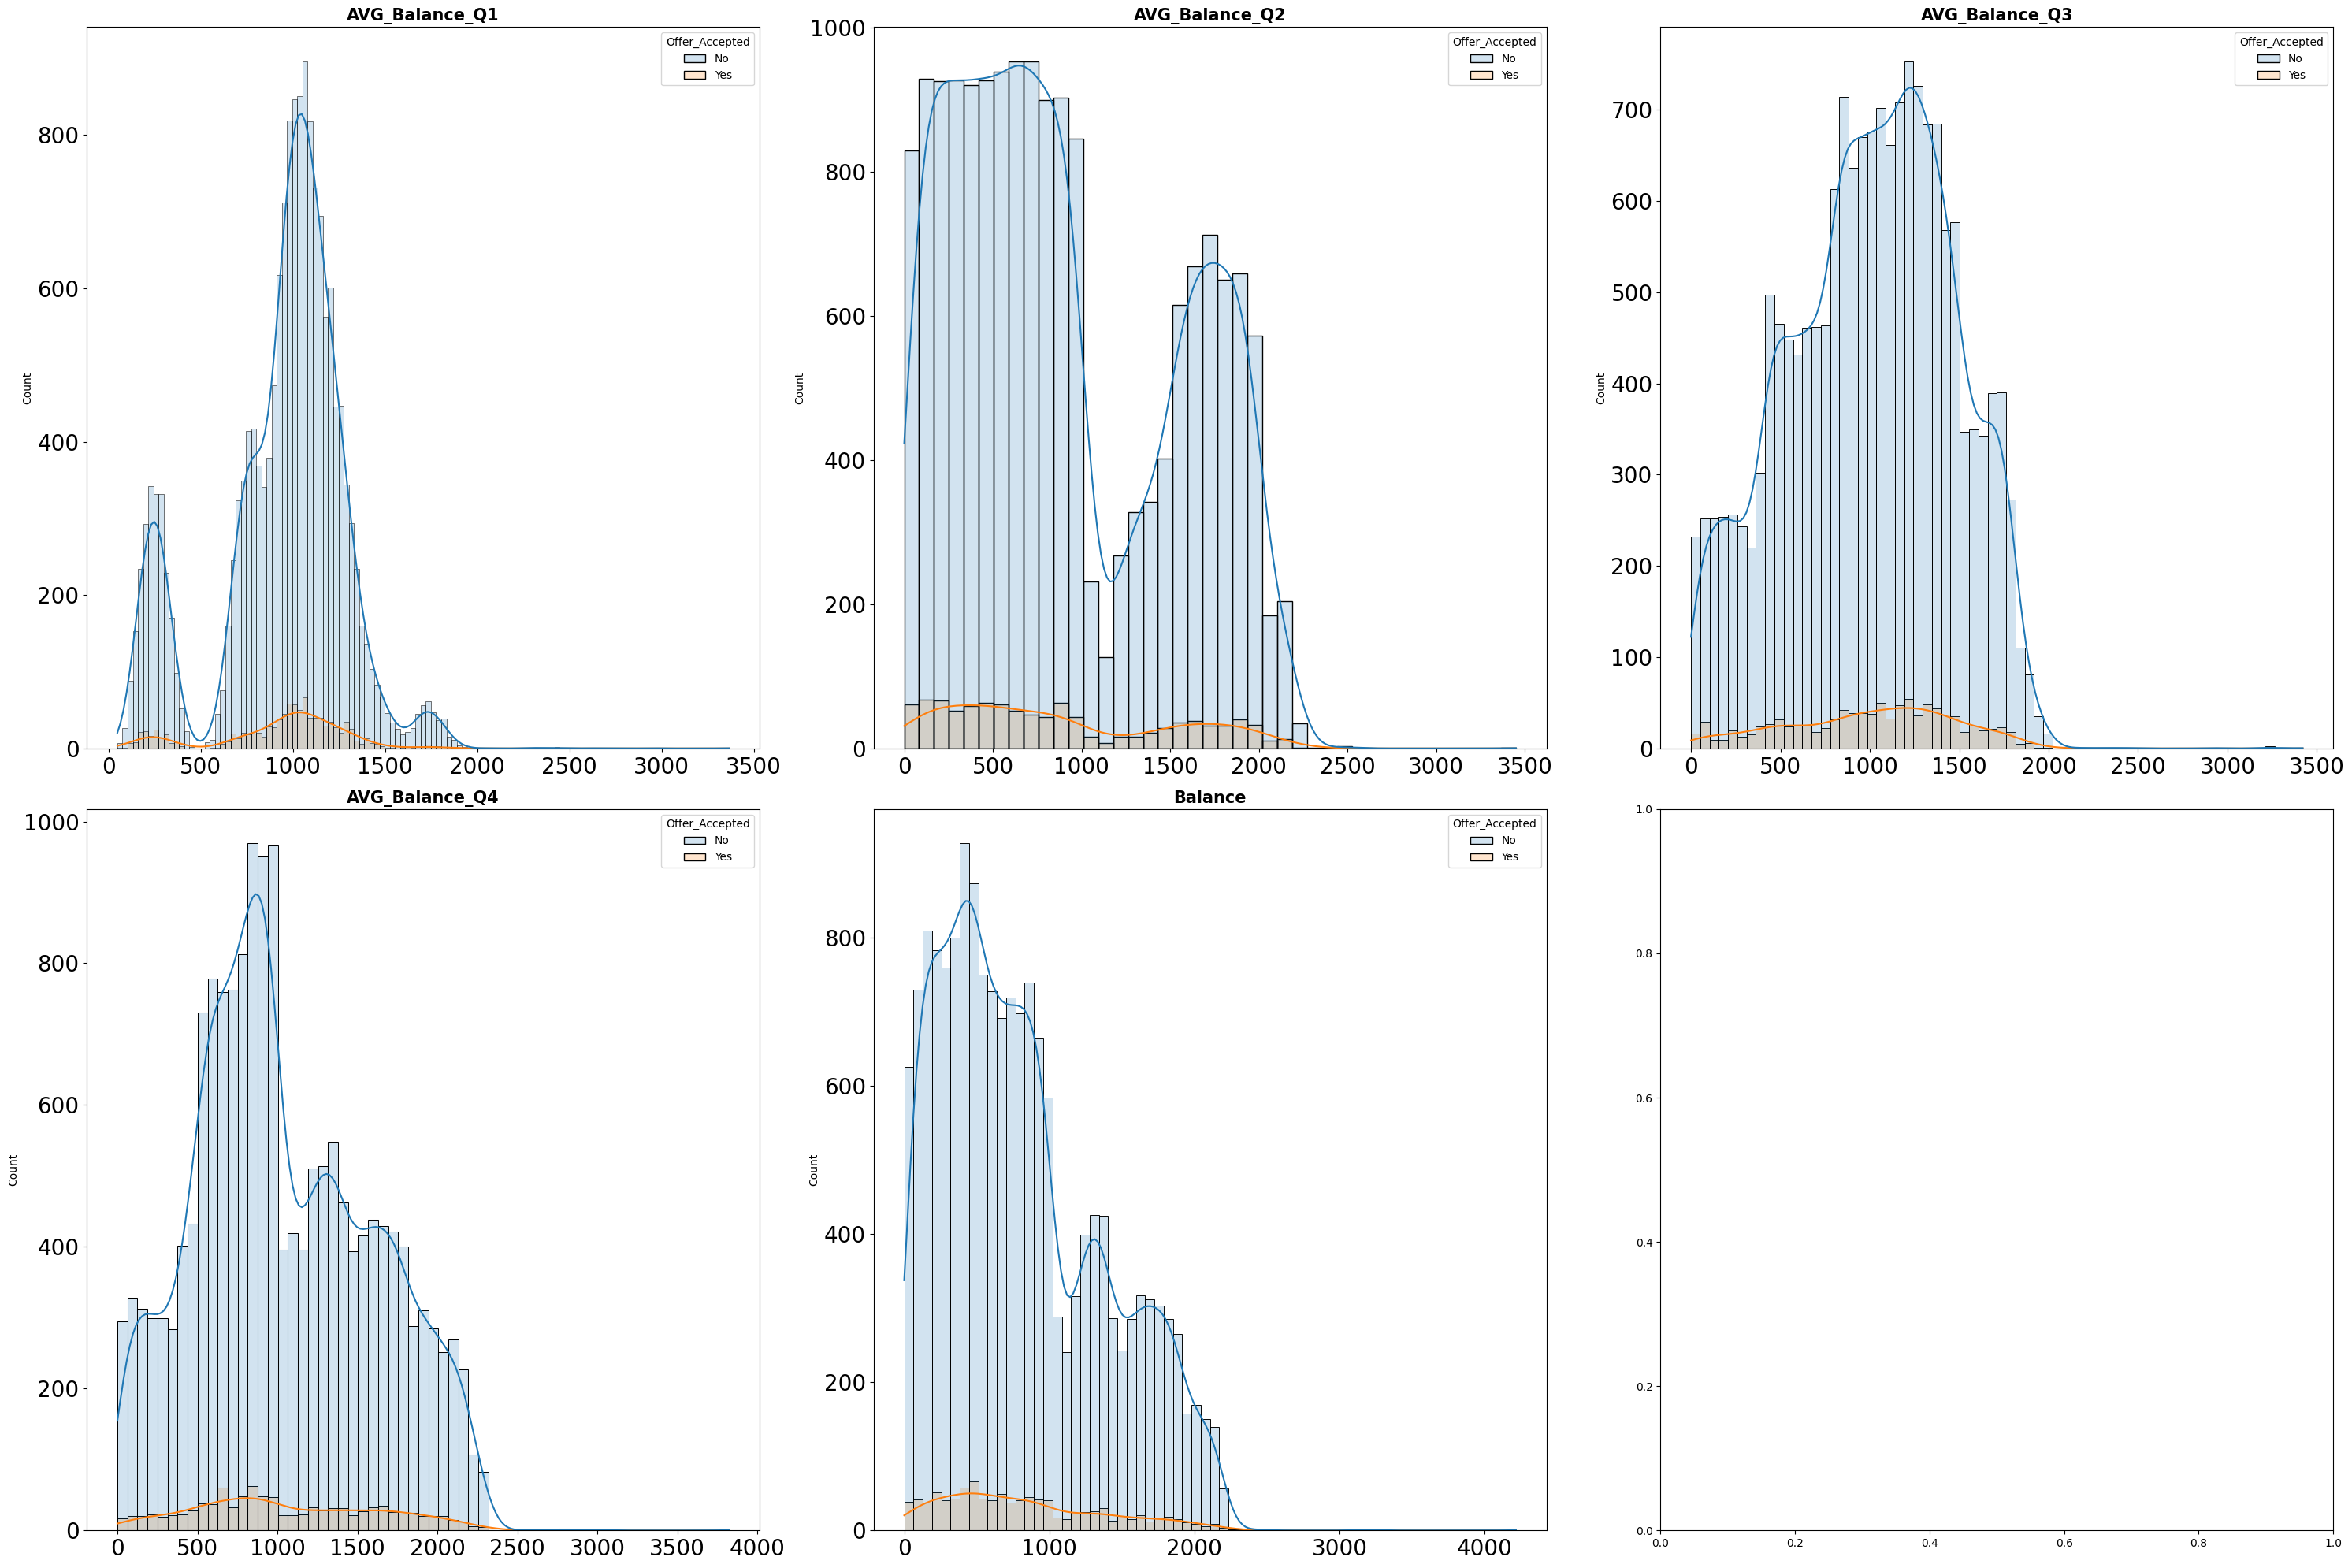

In [10]:
# Gráfico de distribución para cada variable numérica continua

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 20))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).drop(['Customer_Number', 'Household_Size', 'Bank_Accounts_Open', 'Credit_Cards_Held', 'Homes_Owned'], axis = 1).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        alpha = 0.2, 
        ax = axes[i],
        hue = df['Offer_Accepted']
        )
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();# Gráfico de distribución para cada variable numérica

Las variables predictoras numéricas están desviadas hacia la izquierda -- la mayor parte de los valores son pequeños y presentan outliers de valor superior. Esto lo veremos con más profundidad en la gestión de outliers.

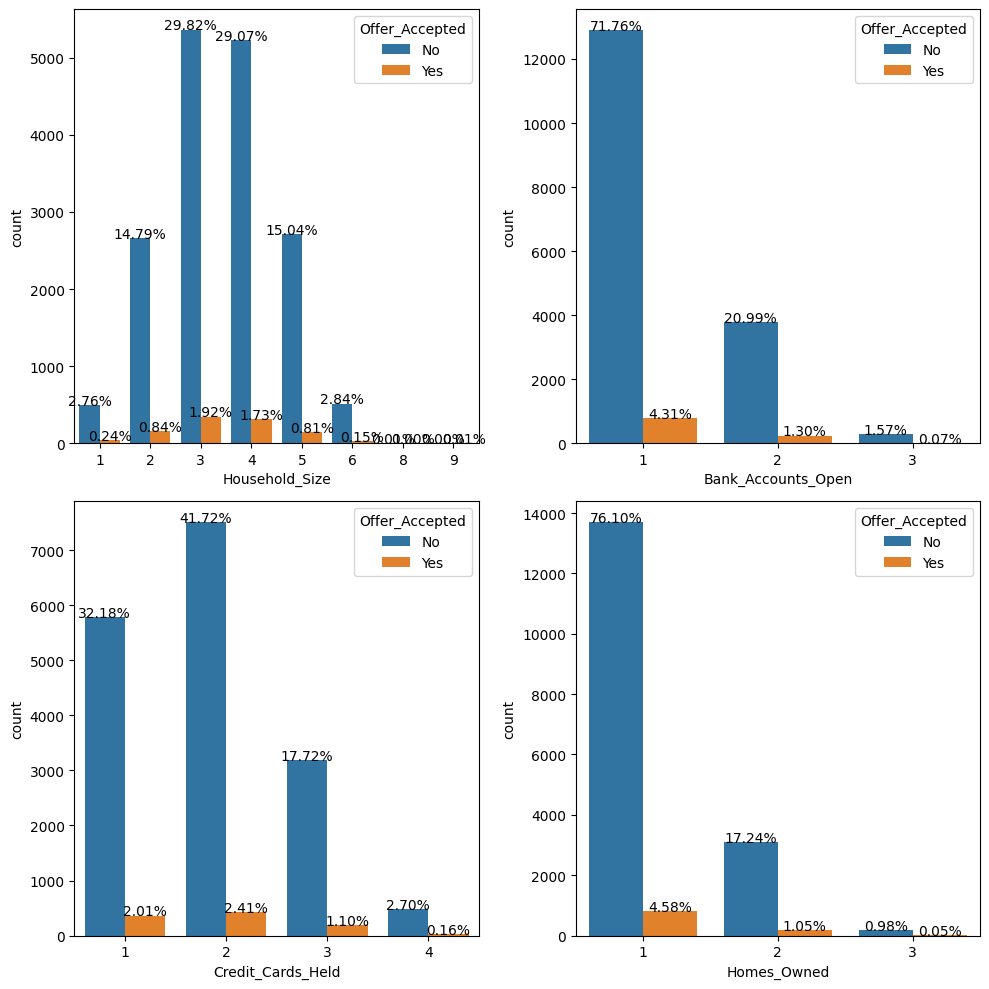

In [11]:
# Gráfico de distribución para cada variable numérica discreta

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))

axes = axes.flat

columnas_numeric_disc = df[['Household_Size', 'Bank_Accounts_Open', 'Credit_Cards_Held', 'Homes_Owned']].columns

for i, colum in enumerate(columnas_numeric_disc):
    chart = sns.countplot(
                x = df[colum], 
                hue = df["Offer_Accepted"],
                ax = axes[i])
    total = float(len(df[colum]))
    for p in chart.patches:
        height = p.get_height()
        chart.text(p.get_x() + p.get_width() / 2., height + 3,
                '{:.2f}%'.format((height / total) * 100),
                ha='center')

fig.tight_layout();

De estas variables, al ser pocas categorías, haremos un encoding como si fueran variables categóricas.

## variables categóricas

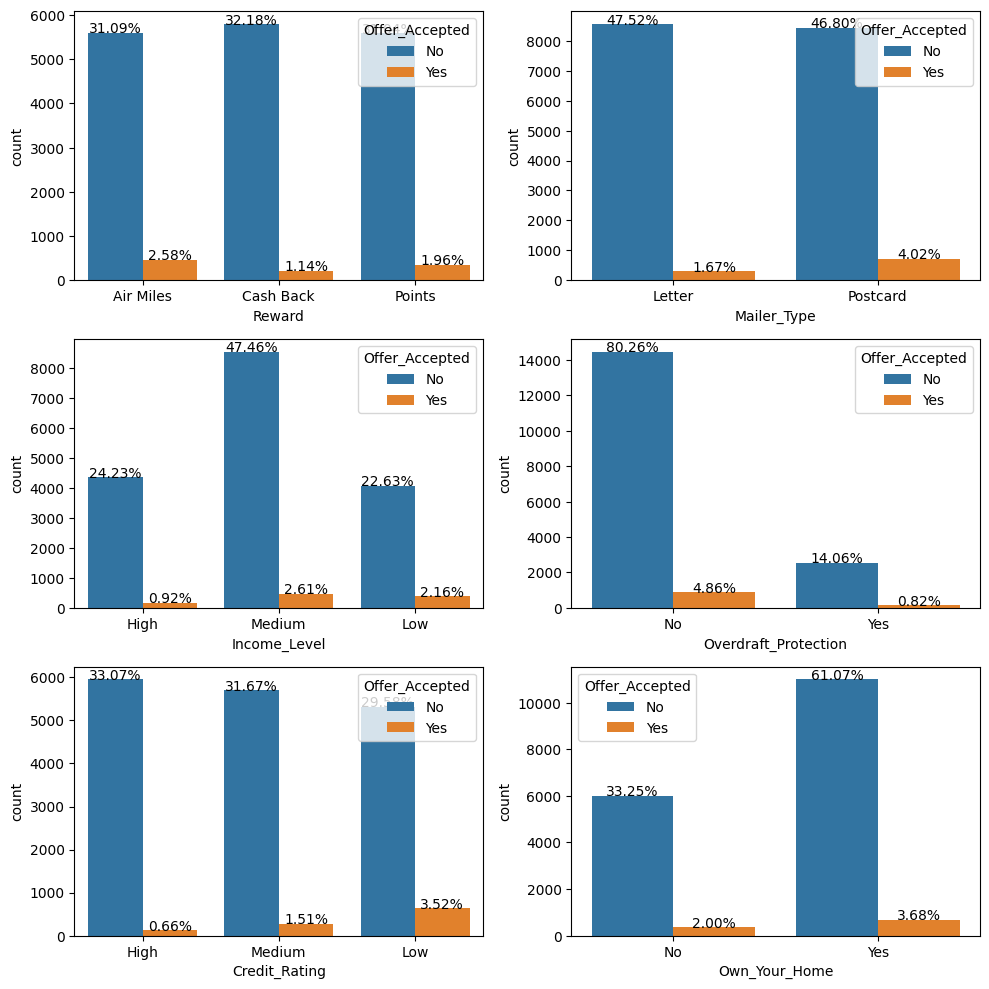

In [12]:
# Gráfico de relación entre variables predictoras y la variable a predecir

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 10))

axes = axes.flat

columnas_cat = df.select_dtypes(include = "object").drop(['Offer_Accepted'], axis = 1).columns

for i, colum in enumerate(columnas_cat):
    chart = sns.countplot(
                x = df[colum],
                hue=df["Offer_Accepted"],
                ax = axes[i])
    total = float(len(df[colum]))
    for p in chart.patches:
        height = p.get_height()
        chart.text(p.get_x() + p.get_width() / 2., height + 3,
                '{:.2f}%'.format((height / total) * 100),
                ha='center')

fig.tight_layout();

existen variables categóricas con orden:
- `Overdraft_protection`
- `Own_Your_Home`
- `Income_Level`

y existen otras variables categóricas que no parecen tener orden:
- `Credit_Rating`
- `Reward`
- `Mailer_Type`

## variable respuesta

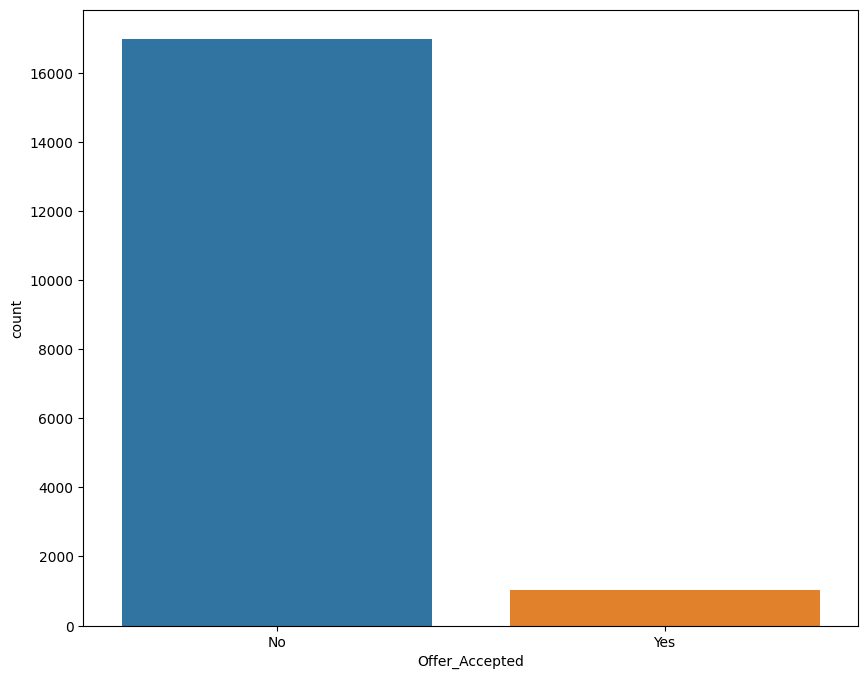

In [13]:
chart = sns.countplot(x = df['Offer_Accepted']);

In [14]:
df['Offer_Accepted'].value_counts() / df.shape[0]

No     0.943167
Yes    0.056833
Name: Offer_Accepted, dtype: float64

Como vemos, la variable respuesta está muy desbalanceada.

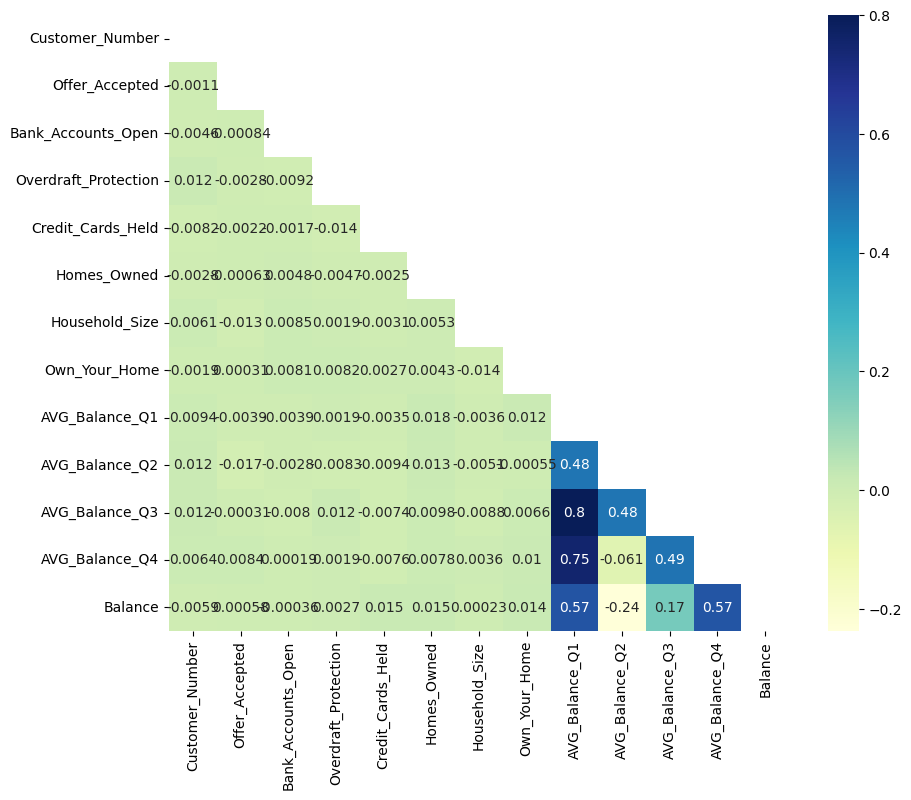

In [15]:
mask = np.triu(np.ones_like(df.replace(to_replace='Yes', value=1).replace(to_replace='No', value=0).corr(), dtype = bool))
sns.heatmap(df.replace(to_replace='Yes', value=1).replace(to_replace='No', value=0).corr(),
           cmap = "YlGnBu",
            mask = mask,
           annot = True);

porque está muy desbalanceada, en la matriz de correlación no vemos ninguna relación significativa. Habrá que repetir el mismo proceso cuando tengamos las variables balanceadas.

## correlacion

# gestión nulos

In [16]:
df.isnull().sum()

Customer_Number          0
Offer_Accepted           0
Reward                   0
Mailer_Type              0
Income_Level             0
Bank_Accounts_Open       0
Overdraft_Protection     0
Credit_Rating            0
Credit_Cards_Held        0
Homes_Owned              0
Household_Size           0
Own_Your_Home            0
AVG_Balance_Q1          24
AVG_Balance_Q2          24
AVG_Balance_Q3          24
AVG_Balance_Q4          24
Balance                 24
dtype: int64

Solo aparecen nulos en las variables que hemos identificado como variables numéricas continuas -> probaremos a sustituir por la mediana o por IterativeImputer, para ver cual tiene mejores resultados.

## iterativee imputer

In [17]:
# creamos una instancia del método Iterative Imputer con las características que queremos 
imputer = IterativeImputer(n_nearest_features=1, missing_values=np.nan, max_iter=10)

In [18]:
numericas1 = df.select_dtypes(include=np.number)
imputer.fit(numericas1)

IterativeImputer(n_nearest_features=1)

In [19]:
# transformamos nuestros datos, para que se reemplacen los valores nulos usando "transform". 
## ⚠️ Esto nos va a devolver un array!

imputer.transform(numericas1)

array([[1.0000e+00, 1.0000e+00, 2.0000e+00, ..., 8.7700e+02, 1.0950e+03,
        1.0020e+03],
       [2.0000e+00, 1.0000e+00, 2.0000e+00, ..., 1.0600e+02, 7.8000e+01,
        3.6600e+02],
       [3.0000e+00, 2.0000e+00, 2.0000e+00, ..., 3.5200e+02, 1.4500e+02,
        2.4200e+02],
       ...,
       [1.7998e+04, 1.0000e+00, 2.0000e+00, ..., 7.6700e+02, 1.1700e+03,
        1.4940e+03],
       [1.7999e+04, 1.0000e+00, 4.0000e+00, ..., 9.8300e+02, 8.6500e+02,
        1.6150e+03],
       [1.8000e+04, 2.0000e+00, 2.0000e+00, ..., 1.3780e+03, 1.9780e+03,
        6.0300e+02]])

In [20]:
# convertimos el array que nos devuelve en un dataframe

numericas_trans = pd.DataFrame(imputer.transform(numericas1), columns = numericas1.columns)
numericas_trans.head()

,Customer_Number,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned,Household_Size,AVG_Balance_Q1,AVG_Balance_Q2,AVG_Balance_Q3,AVG_Balance_Q4,Balance
0,1.0,1.0,2.0,1.0,4.0,1160.75,1669.0,877.0,1095.0,1002.0
1,2.0,1.0,2.0,2.0,5.0,147.25,39.0,106.0,78.0,366.0
2,3.0,2.0,2.0,1.0,2.0,276.50,367.0,352.0,145.0,242.0
3,4.0,2.0,1.0,1.0,4.0,1219.00,1578.0,1760.0,1119.0,419.0
4,5.0,1.0,2.0,1.0,6.0,1211.00,2140.0,1357.0,982.0,365.0


In [21]:
df_it = df.copy()
df_it.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,AVG_Balance_Q1,AVG_Balance_Q2,AVG_Balance_Q3,AVG_Balance_Q4,Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [22]:
df_it[numericas_trans.columns] = numericas_trans
df_it.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,AVG_Balance_Q1,AVG_Balance_Q2,AVG_Balance_Q3,AVG_Balance_Q4,Balance
0,1.0,No,Air Miles,Letter,High,1.0,No,High,2.0,1.0,4.0,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2.0,No,Air Miles,Letter,Medium,1.0,No,Medium,2.0,2.0,5.0,Yes,147.25,39.0,106.0,78.0,366.0
2,3.0,No,Air Miles,Postcard,High,2.0,No,Medium,2.0,1.0,2.0,Yes,276.50,367.0,352.0,145.0,242.0
3,4.0,No,Air Miles,Letter,Medium,2.0,No,High,1.0,1.0,4.0,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5.0,No,Air Miles,Letter,Medium,1.0,No,Medium,2.0,1.0,6.0,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [23]:
df_it.isnull().sum()

Customer_Number         0
Offer_Accepted          0
Reward                  0
Mailer_Type             0
Income_Level            0
Bank_Accounts_Open      0
Overdraft_Protection    0
Credit_Rating           0
Credit_Cards_Held       0
Homes_Owned             0
Household_Size          0
Own_Your_Home           0
AVG_Balance_Q1          0
AVG_Balance_Q2          0
AVG_Balance_Q3          0
AVG_Balance_Q4          0
Balance                 0
dtype: int64

## median replace

In [24]:
df_medi = df.copy()

In [25]:
column_list = ['AVG_Balance_Q1', 'AVG_Balance_Q2', 'AVG_Balance_Q3', 'AVG_Balance_Q4','Balance']
for column in column_list:
    mediana = df_medi[column].median()
    df_medi[column].fillna(mediana, inplace=True)

In [26]:
df_medi.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,AVG_Balance_Q1,AVG_Balance_Q2,AVG_Balance_Q3,AVG_Balance_Q4,Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Number,18000.0,9000.500000,5196.296758,1.00,4500.75,9000.5,13500.25,18000.00
Bank_Accounts_Open,18000.0,1.255778,0.472501,1.00,1.00,1.0,1.00,3.00
Credit_Cards_Held,18000.0,1.903500,0.797009,1.00,1.00,2.0,2.00,4.00
Homes_Owned,18000.0,1.203444,0.427341,1.00,1.00,1.0,1.00,3.00
Household_Size,18000.0,3.499056,1.114182,1.00,3.00,3.0,4.00,9.00
AVG_Balance_Q1,17976.0,940.515562,350.297837,48.25,787.50,1007.0,1153.25,3366.25
AVG_Balance_Q2,17976.0,910.450656,620.077060,0.00,392.75,772.0,1521.00,3450.00
AVG_Balance_Q3,17976.0,999.392190,457.402268,0.00,663.00,1032.0,1342.00,3421.00
AVG_Balance_Q4,17976.0,1042.033600,553.452599,0.00,633.00,945.5,1463.00,3823.00
Balance,17976.0,810.185803,559.001365,0.00,363.00,703.0,1212.00,4215.00


In [28]:
df_it.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Number,18000.0,9000.500000,5196.296758,1.00,4500.7500,9000.5,13500.2500,18000.00
Bank_Accounts_Open,18000.0,1.255778,0.472501,1.00,1.0000,1.0,1.0000,3.00
Credit_Cards_Held,18000.0,1.903500,0.797009,1.00,1.0000,2.0,2.0000,4.00
Homes_Owned,18000.0,1.203444,0.427341,1.00,1.0000,1.0,1.0000,3.00
Household_Size,18000.0,3.499056,1.114182,1.00,3.0000,3.0,4.0000,9.00
AVG_Balance_Q1,18000.0,940.515562,350.064214,48.25,787.9375,1006.5,1152.5625,3366.25
AVG_Balance_Q2,18000.0,910.450656,619.663515,0.00,393.0000,773.0,1520.2500,3450.00
AVG_Balance_Q3,18000.0,999.392190,457.097214,0.00,664.0000,1032.0,1342.0000,3421.00
AVG_Balance_Q4,18000.0,1042.033600,553.083487,0.00,633.0000,946.0,1462.0000,3823.00
Balance,18000.0,810.185803,558.628553,0.00,363.7500,704.0,1211.0000,4215.00


In [29]:
df_medi.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Number,18000.0,9000.500000,5196.296758,1.00,4500.7500,9000.5,13500.2500,18000.00
Bank_Accounts_Open,18000.0,1.255778,0.472501,1.00,1.0000,1.0,1.0000,3.00
Credit_Cards_Held,18000.0,1.903500,0.797009,1.00,1.0000,2.0,2.0000,4.00
Homes_Owned,18000.0,1.203444,0.427341,1.00,1.0000,1.0,1.0000,3.00
Household_Size,18000.0,3.499056,1.114182,1.00,3.0000,3.0,4.0000,9.00
AVG_Balance_Q1,18000.0,940.604208,350.072621,48.25,787.9375,1007.0,1152.5625,3366.25
AVG_Balance_Q2,18000.0,910.266056,619.684111,0.00,393.0000,772.0,1520.2500,3450.00
AVG_Balance_Q3,18000.0,999.435667,457.098763,0.00,664.0000,1032.0,1342.0000,3421.00
AVG_Balance_Q4,18000.0,1041.904889,553.094705,0.00,633.0000,945.5,1462.0000,3823.00
Balance,18000.0,810.042889,558.642246,0.00,363.7500,703.0,1211.0000,4215.00


puntúan relativamente similar, así que mantendré el dataframe del iterative imputer.

# gestión outliers
para ver los outliers de las varaibles numéricas continuas, usaremos un boxplot

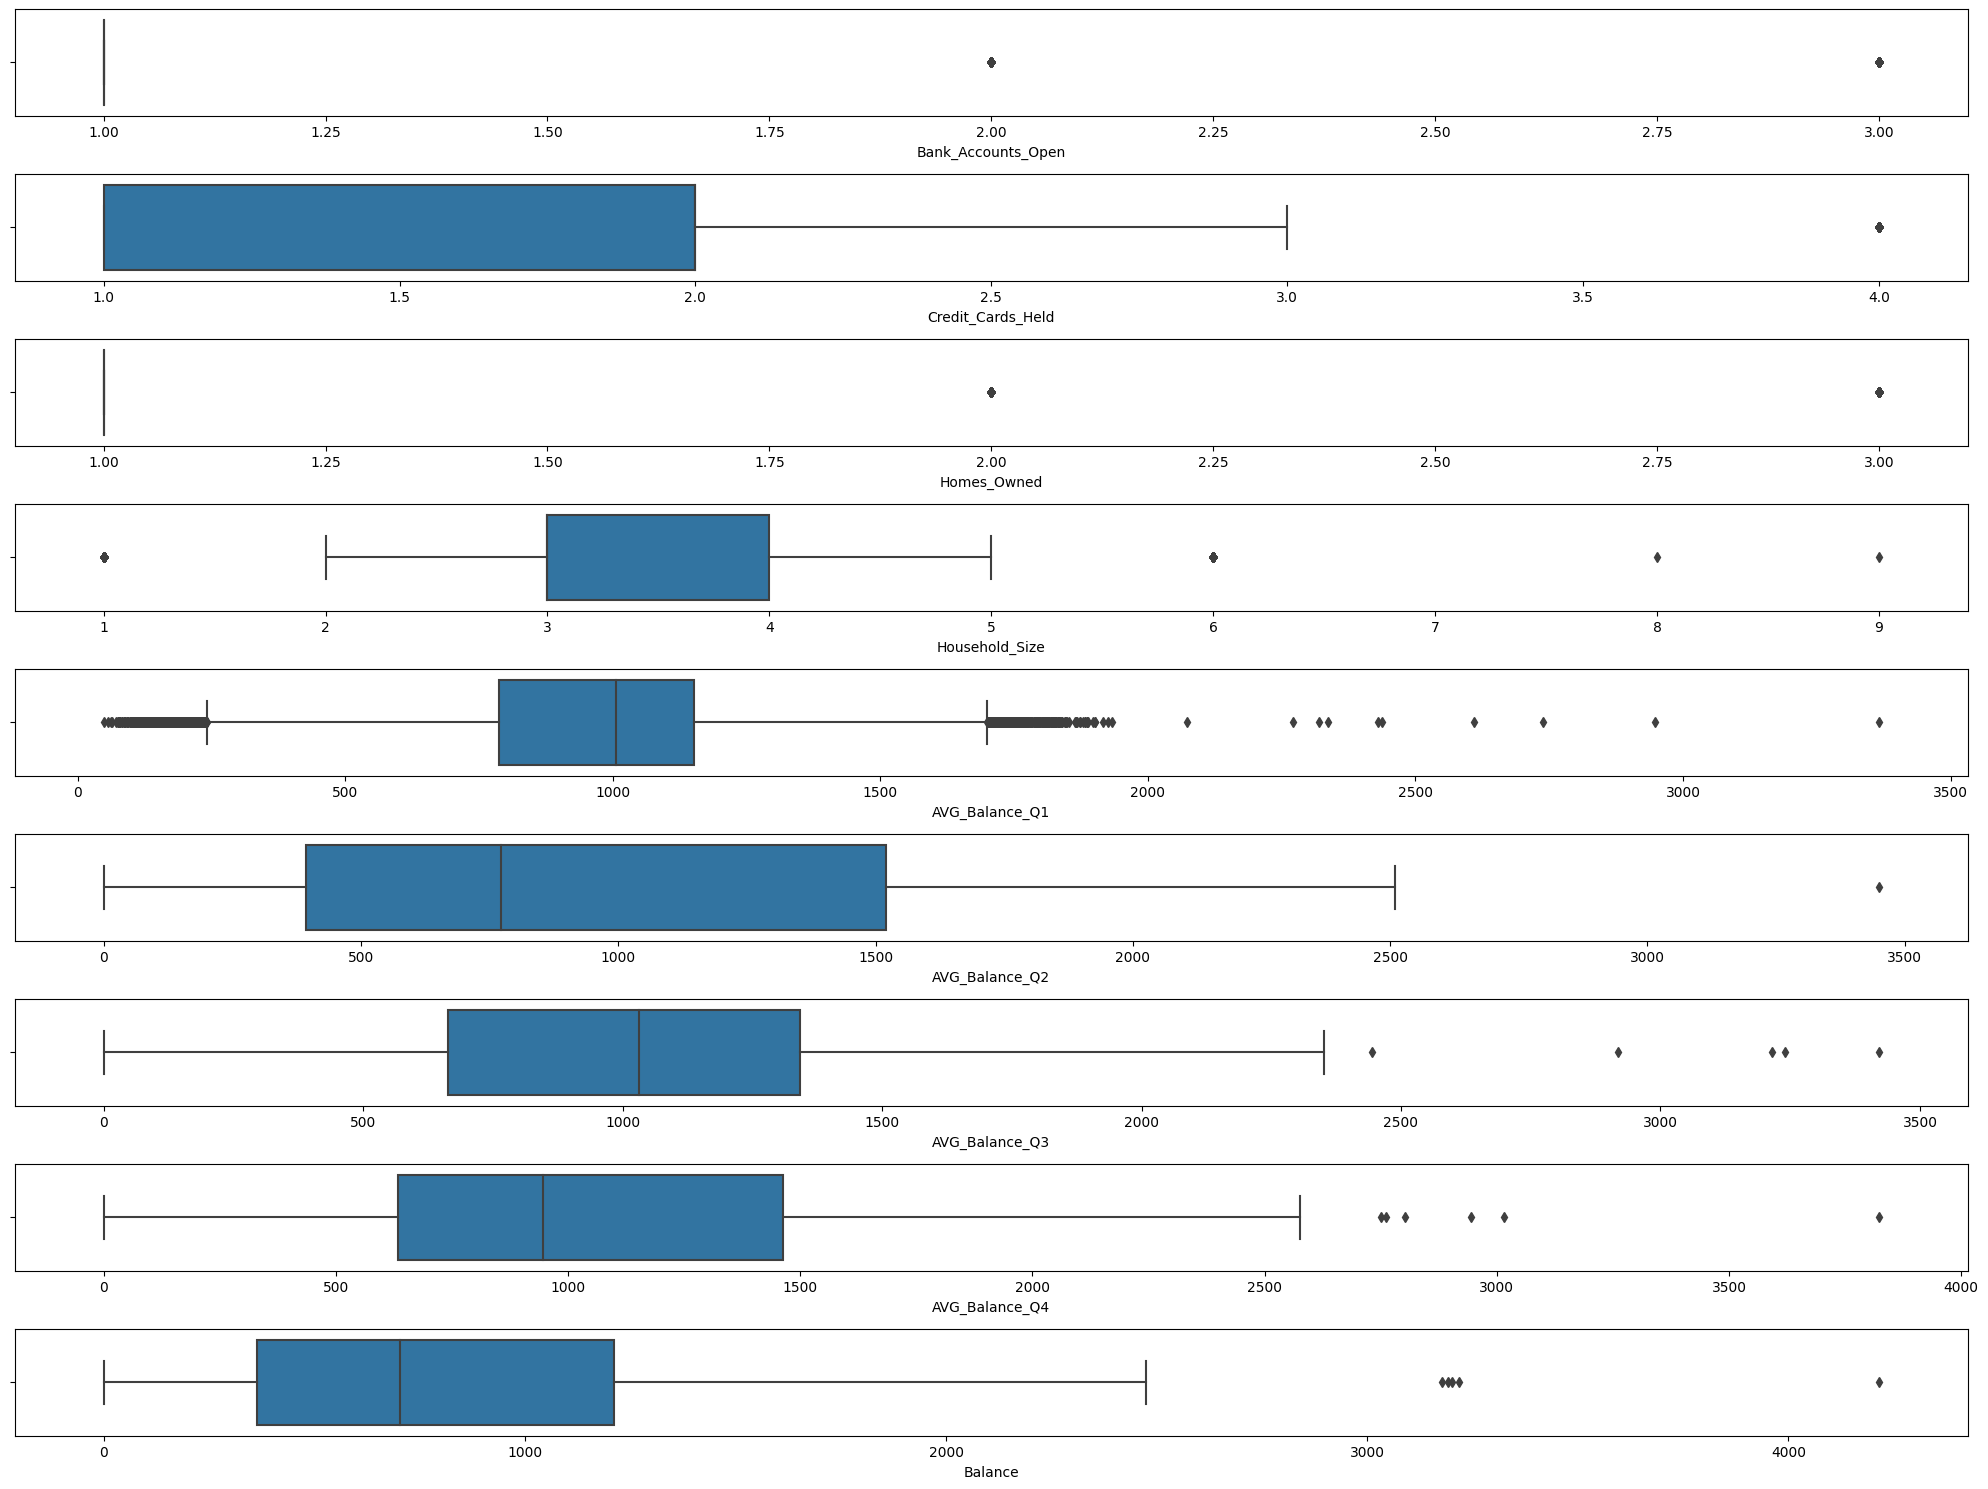

In [30]:
df_numericas = df_it.select_dtypes(include = np.number).drop(['Customer_Number'], axis =1)
fig, ax = plt.subplots(9, 1, figsize=(20,15))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
    #ax[i].set_title(i)
plt.tight_layout()
plt.show()

In [31]:
def detectar_outliers(lista_columnas, dataframe):

    dict_indices = {}

    for i in lista_columnas:
        Q1 = np.nanpercentile(dataframe[i], 25)
        Q3 = np.nanpercentile(dataframe[i], 75)

        IQR = Q3 - Q1

        outlier_step = IQR * 1.5
        outliers_value = dataframe[(dataframe[i] < Q1 - outlier_step) | (dataframe[i] > Q3 + outlier_step)]

        if outliers_value.shape[0] > 0:
            dict_indices[i] = outliers_value.index.tolist()
        else:
            #dict_indices[i] = 'sin outliers'
            pass
    return dict_indices

In [32]:
dict_outliers = detectar_outliers(df_numericas.columns, df_numericas)
for key in dict_outliers.keys():
    print(key, '-', len(dict_outliers[key]), '-', len(dict_outliers[key]) * 100 / df_numericas.shape[0])

Bank_Accounts_Open - 4308 - 23.933333333333334
Credit_Cards_Held - 515 - 2.861111111111111
Homes_Owned - 3477 - 19.316666666666666
Household_Size - 1079 - 5.9944444444444445
AVG_Balance_Q1 - 1471 - 8.172222222222222
AVG_Balance_Q2 - 1 - 0.005555555555555556
AVG_Balance_Q3 - 5 - 0.027777777777777776
AVG_Balance_Q4 - 6 - 0.03333333333333333
Balance - 5 - 0.027777777777777776


Viendo los outliers, las variables numéricas continuas ['AVG_Balance_Q1', 'AVG_Balance_Q2', 'AVG_Balance_Q3', 'AVG_Balance_Q4', 'Balance'] son las que menos presentan outliers. 
<br>Las variables que más outliers presentan son las variables numéricas discretas [Bank_Accounts_Open, Credit_Cards_Held, Homes_Owned, Household_Size], pero eso se puede corregir haciendo un encoding posteriormente, ya que se pueden considerar variables categóricas.
<br>En este caso, vamos a mantener los outliers.

# estandarización

In [33]:
def estandarizacion(dataframe, columnas, input):
    data = dataframe[columnas]
    if input == 'media':
        modelo = StandardScaler()
    elif input == 'mediana':
        modelo = RobustScaler()
    else:
        print("aprende a escribir")
    modelo.fit(data)
    X = modelo.transform(data)
    return X

En este caso, como mantenemos los outliers, mejor un `RobustScaler` para estandarizar con la mediana.

In [34]:
df_it[columnas_numeric] = estandarizacion(df_it, columnas_numeric, 'mediana')
df_it.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,AVG_Balance_Q1,AVG_Balance_Q2,AVG_Balance_Q3,AVG_Balance_Q4,Balance
0,1.0,No,Air Miles,Letter,High,1.0,No,High,2.0,1.0,4.0,No,0.423037,0.794855,-0.228614,0.179735,0.351726
1,2.0,No,Air Miles,Letter,Medium,1.0,No,Medium,2.0,2.0,5.0,Yes,-2.356531,-0.651142,-1.365782,-1.047045,-0.398938
2,3.0,No,Air Miles,Postcard,High,2.0,No,Medium,2.0,1.0,2.0,Yes,-2.002057,-0.360169,-1.002950,-0.966224,-0.545294
3,4.0,No,Air Miles,Letter,Medium,2.0,No,High,1.0,1.0,4.0,No,0.582791,0.714127,1.073746,0.208685,-0.336382
4,5.0,No,Air Miles,Letter,Medium,1.0,No,Medium,2.0,1.0,6.0,Yes,0.560850,1.212686,0.479351,0.043426,-0.400118


# encoding

Para el encoding, se tomaran las variables categóricas y las continuas discretas.

In [35]:
columnas_cat = df_it.columns.drop(columnas_numeric.tolist()).drop('Customer_Number')
df_cat = df_it[columnas_cat]
print(df_cat.shape)
df_cat.head(1)

(18000, 11)


,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home
0,No,Air Miles,Letter,High,1.0,No,High,2.0,1.0,4.0,No


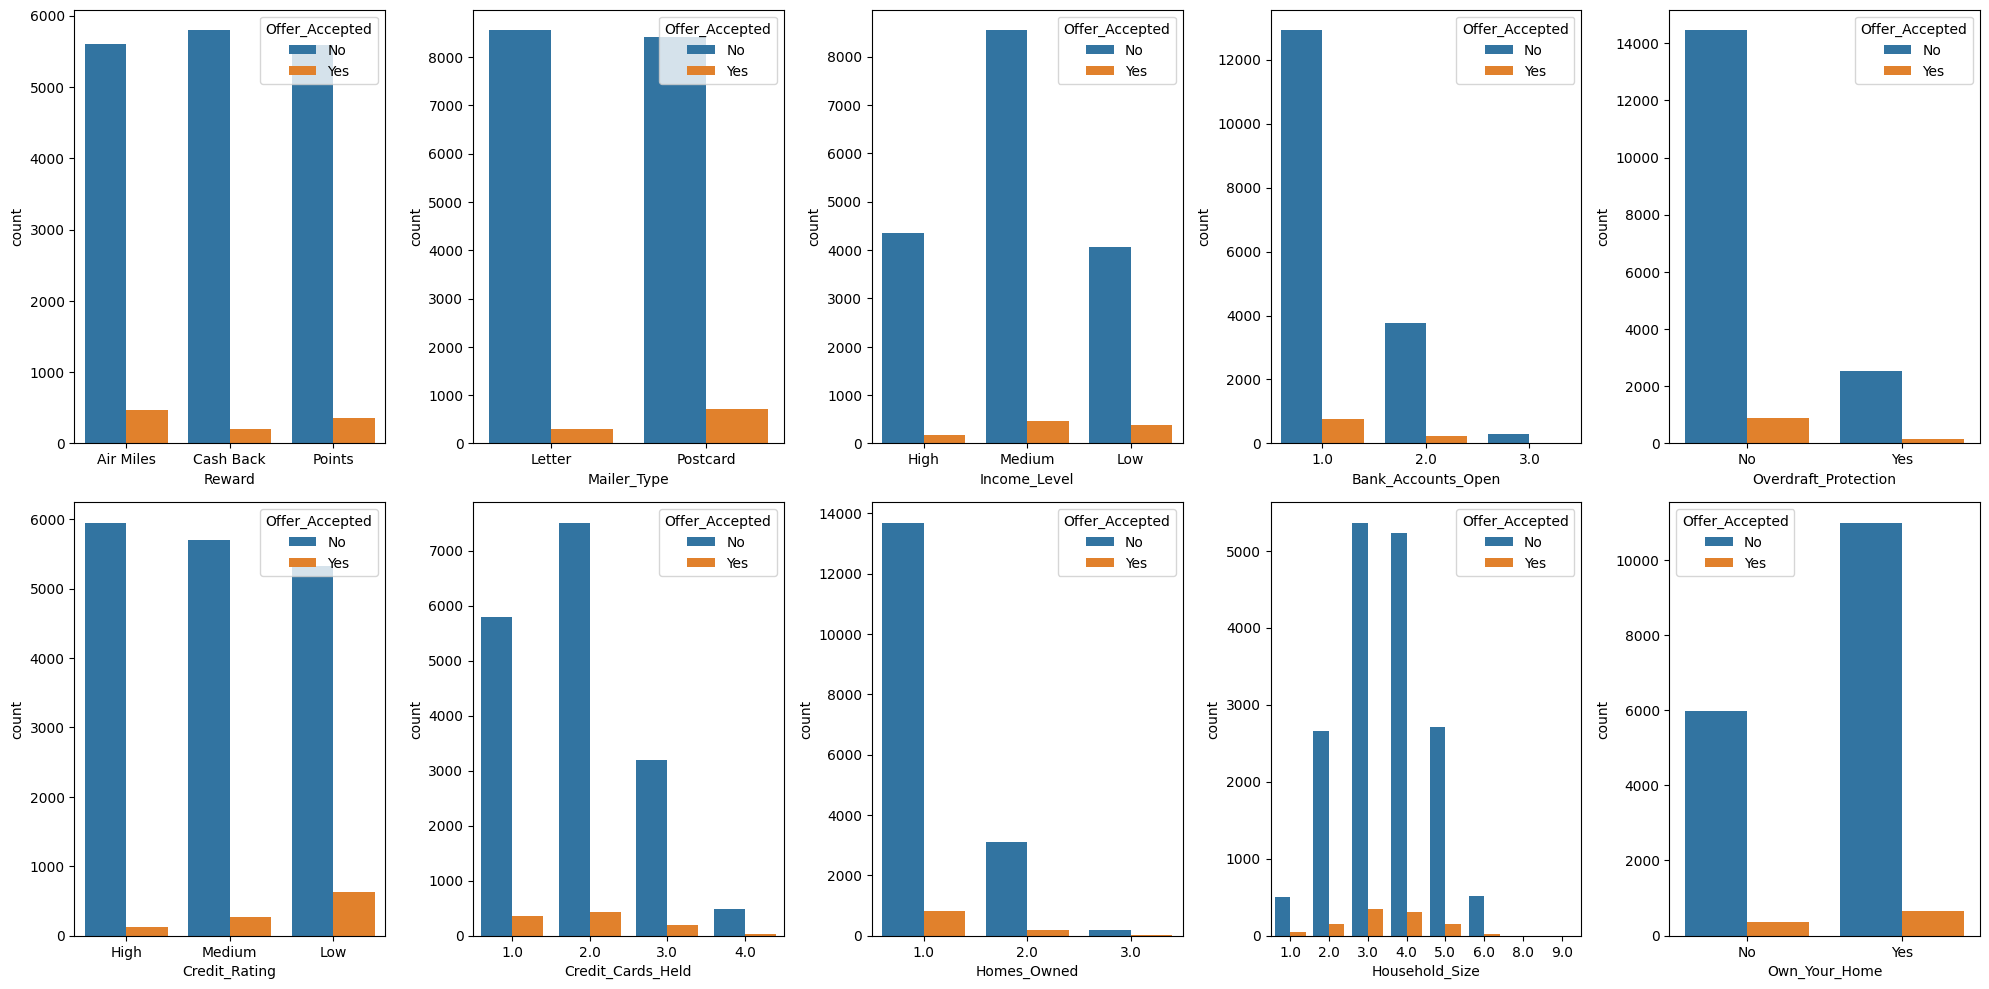

In [36]:
# Gráfico de relación entre variables predictoras y la variable a predecir

fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (20, 10))

axes = axes.flat

for i, colum in enumerate(columnas_cat.drop('Offer_Accepted')):
    chart = sns.countplot(
            x = df_cat[colum],
            hue = df_cat['Offer_Accepted'],
            ax = axes[i])

fig.tight_layout();

existen variables categóricas con orden:
- `Income_Level`
- `Bank_Accounts_Open`
- `Overdraft_protection`
- `Credit_Card_Held`
- `Homes_Owned`
- `Household_Size`
- `Own_Your_Home`

y existen otras variables categóricas que no parecen tener orden:
- `Reward`
- `Mailer_Type`
- `Credit_Rating`

In [37]:
def encoding(dataframe, columnas, input):
    if input == 'sin orden':
        modelo = OneHotEncoder()
        for columna in columnas:
            transformados = modelo.fit_transform(dataframe[[columna]])
            
            oh_df = pd.DataFrame(transformados.toarray(), columns = modelo.get_feature_names_out(), dtype = int)
            
            dataframe[oh_df.columns] = oh_df
            
            dataframe.drop(columna, axis = 1, inplace = True)
            
            with open(f'datos/encoding_{columna}.pkl', 'wb') as s:
                pickle.dump(modelo, s)
        
        return dataframe
    elif input == 'con orden':
        for columna in columnas:
            if dataframe[columna].dtype == 'float64' or dataframe[columna].dtype == 'int64':
                dataframe[columna] = dataframe[columna].astype(int).astype(str)
            else:
                pass
            orden = pd.DataFrame(dataframe[columna].value_counts()).reset_index().sort_values(by=columna)['index'].unique().tolist()
            modelo = OrdinalEncoder(categories = [orden], dtype = int)
            transformados = modelo.fit_transform(dataframe[[columna]])
            dataframe[columna] = transformados
            with open(f'datos/encoding_{columna}.pkl', 'wb') as s:
                pickle.dump(modelo, s)
        return dataframe
    else:
        print("aprende a escribir")


In [38]:
df_cat.dtypes

Offer_Accepted           object
Reward                   object
Mailer_Type              object
Income_Level             object
Bank_Accounts_Open      float64
Overdraft_Protection     object
Credit_Rating            object
Credit_Cards_Held       float64
Homes_Owned             float64
Household_Size          float64
Own_Your_Home            object
dtype: object

In [39]:
sin_orden = ['Reward', 'Mailer_Type', 'Credit_Rating']
con_orden = ['Income_Level', 'Bank_Accounts_Open', 'Overdraft_Protection', 'Credit_Cards_Held', 'Homes_Owned', 'Household_Size', 'Own_Your_Home', 'Offer_Accepted']

In [40]:
encoding(df_cat, sin_orden, 'sin orden')

,Offer_Accepted,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer_Type_Letter,Mailer_Type_Postcard,Credit_Rating_High,Credit_Rating_Low,Credit_Rating_Medium
0,No,High,1.0,No,2.0,1.0,4.0,No,1,0,0,1,0,1,0,0
1,No,Medium,1.0,No,2.0,2.0,5.0,Yes,1,0,0,1,0,0,0,1
2,No,High,2.0,No,2.0,1.0,2.0,Yes,1,0,0,0,1,0,0,1
3,No,Medium,2.0,No,1.0,1.0,4.0,No,1,0,0,1,0,1,0,0
4,No,Medium,1.0,No,2.0,1.0,6.0,Yes,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,No,High,1.0,No,1.0,1.0,5.0,Yes,0,1,0,1,0,0,1,0
17996,No,High,1.0,No,3.0,1.0,3.0,Yes,0,1,0,1,0,0,1,0
17997,No,High,1.0,No,2.0,1.0,4.0,No,0,1,0,1,0,0,1,0
17998,No,Medium,1.0,No,4.0,2.0,2.0,Yes,0,1,0,1,0,0,0,1


In [41]:
encoding(df_cat, con_orden, 'con orden')

,Offer_Accepted,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer_Type_Letter,Mailer_Type_Postcard,Credit_Rating_High,Credit_Rating_Low,Credit_Rating_Medium
0,1,1,2,1,3,2,6,0,1,0,0,1,0,1,0,0
1,1,2,2,1,3,1,5,1,1,0,0,1,0,0,0,1
2,1,1,1,1,3,2,4,1,1,0,0,0,1,0,0,1
3,1,2,1,1,2,2,6,0,1,0,0,1,0,1,0,0
4,1,2,2,1,3,2,2,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,1,1,2,1,2,2,5,1,0,1,0,1,0,0,1,0
17996,1,1,2,1,1,2,7,1,0,1,0,1,0,0,1,0
17997,1,1,2,1,3,2,6,0,0,1,0,1,0,0,1,0
17998,1,2,2,1,0,1,4,1,0,1,0,1,0,0,0,1


In [42]:
df_pre = pd.concat([df_it['Customer_Number'], df_cat, df_it[columnas_numeric]], axis=1)
df_pre.head()

,Customer_Number,Offer_Accepted,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer_Type_Letter,Mailer_Type_Postcard,Credit_Rating_High,Credit_Rating_Low,Credit_Rating_Medium,AVG_Balance_Q1,AVG_Balance_Q2,AVG_Balance_Q3,AVG_Balance_Q4,Balance
0,1.0,1,1,2,1,3,2,6,0,1,0,0,1,0,1,0,0,0.423037,0.794855,-0.228614,0.179735,0.351726
1,2.0,1,2,2,1,3,1,5,1,1,0,0,1,0,0,0,1,-2.356531,-0.651142,-1.365782,-1.047045,-0.398938
2,3.0,1,1,1,1,3,2,4,1,1,0,0,0,1,0,0,1,-2.002057,-0.360169,-1.002950,-0.966224,-0.545294
3,4.0,1,2,1,1,2,2,6,0,1,0,0,1,0,1,0,0,0.582791,0.714127,1.073746,0.208685,-0.336382
4,5.0,1,2,2,1,3,2,2,1,1,0,0,1,0,0,0,1,0.560850,1.212686,0.479351,0.043426,-0.400118


# balanceo de las variables

me genero una función para tener las dos posibilidades de balanceo: downsampling y upsampling.

In [43]:
def balanceo(dataframe, variable_respuesta, input):
    X = dataframe.drop([variable_respuesta], axis = 1)
    y = dataframe[[variable_respuesta]]
    if input == 'downsampling':
        modelo = RandomUnderSampler()
    elif input == 'upsampling':
        modelo = RandomOverSampler()
    else:
        print("aprende a escribir")
    X_mod, y_mod = modelo.fit_resample(X,y)
    return X_mod, y_mod

Pruebo con el upsampling:
<br>Anteriormente probé haciendo downsamling, pero los modelos no daban buenas métricas. Puede deberse a la falta de datos disponibles.

In [44]:
X, y = balanceo(df_pre, 'Offer_Accepted', 'upsampling')

In [45]:
print(X.shape)
X.head()

(33954, 21)


,Customer_Number,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer_Type_Letter,Mailer_Type_Postcard,Credit_Rating_High,Credit_Rating_Low,Credit_Rating_Medium,AVG_Balance_Q1,AVG_Balance_Q2,AVG_Balance_Q3,AVG_Balance_Q4,Balance
0,1.0,1,2,1,3,2,6,0,1,0,0,1,0,1,0,0,0.423037,0.794855,-0.228614,0.179735,0.351726
1,2.0,2,2,1,3,1,5,1,1,0,0,1,0,0,0,1,-2.356531,-0.651142,-1.365782,-1.047045,-0.398938
2,3.0,1,1,1,3,2,4,1,1,0,0,0,1,0,0,1,-2.002057,-0.360169,-1.002950,-0.966224,-0.545294
3,4.0,2,1,1,2,2,6,0,1,0,0,1,0,1,0,0,0.582791,0.714127,1.073746,0.208685,-0.336382
4,5.0,2,2,1,3,2,2,1,1,0,0,1,0,0,0,1,0.560850,1.212686,0.479351,0.043426,-0.400118


In [46]:
print(y.shape)
y.head()

(33954, 1)


,Offer_Accepted
0,1
1,1
2,1
3,1
4,1


In [47]:
y.value_counts()

Offer_Accepted
0                 16977
1                 16977
dtype: int64

In [48]:
df_modelo = pd.concat([X, y], axis = 1)
df_modelo.head()

,Customer_Number,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer_Type_Letter,Mailer_Type_Postcard,Credit_Rating_High,Credit_Rating_Low,Credit_Rating_Medium,AVG_Balance_Q1,AVG_Balance_Q2,AVG_Balance_Q3,AVG_Balance_Q4,Balance,Offer_Accepted
0,1.0,1,2,1,3,2,6,0,1,0,0,1,0,1,0,0,0.423037,0.794855,-0.228614,0.179735,0.351726,1
1,2.0,2,2,1,3,1,5,1,1,0,0,1,0,0,0,1,-2.356531,-0.651142,-1.365782,-1.047045,-0.398938,1
2,3.0,1,1,1,3,2,4,1,1,0,0,0,1,0,0,1,-2.002057,-0.360169,-1.002950,-0.966224,-0.545294,1
3,4.0,2,1,1,2,2,6,0,1,0,0,1,0,1,0,0,0.582791,0.714127,1.073746,0.208685,-0.336382,1
4,5.0,2,2,1,3,2,2,1,1,0,0,1,0,0,0,1,0.560850,1.212686,0.479351,0.043426,-0.400118,1


# Modelo

In [49]:
def modelo(dataframe, variableRespuesta, input):
    X = dataframe.drop(variableRespuesta, axis = 1)
    y = dataframe[variableRespuesta]
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 666)
    if input == 'Regresión logística':
        modelo = LogisticRegression(max_iter = 100000)
        modelo.fit(X_train, y_train)
        y_pred_test = modelo.predict(X_test)
        y_pred_train = modelo.predict(X_train)
        return X_train, X_test, y_test, y_pred_test, y_train, y_pred_train


In [50]:
# dividimos el dataset en variables predictoras y respuesta
X = df_modelo.drop(["Customer_Number", "Offer_Accepted"], axis = 1) # variables predictoras
y = df_modelo["Offer_Accepted"] # variable respuesta 

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 666)

In [52]:
y_train.describe()

count    27163.000000
mean         0.498730
std          0.500008
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Offer_Accepted, dtype: float64

In [53]:
y_test.describe()

count    6791.000000
mean        0.505080
std         0.500011
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Offer_Accepted, dtype: float64

## Regresión Logística

In [54]:
lr = LogisticRegression(max_iter = 100000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [55]:
y_pred_lr_test = lr.predict(X_test)
y_pred_lr_train = lr.predict(X_train)

In [56]:
def matriz_confusion(clases_reales, clases_predichas, total_filas_test):
  
    matriz = confusion_matrix(clases_reales, clases_predichas)

    plt.figure(figsize = (12, 8))
    sns.heatmap(matriz, square=True, annot=True, fmt="d", cmap = "viridis")

    plt.xlabel('valor predicho')
    plt.ylabel('valor real')
    plt.show()

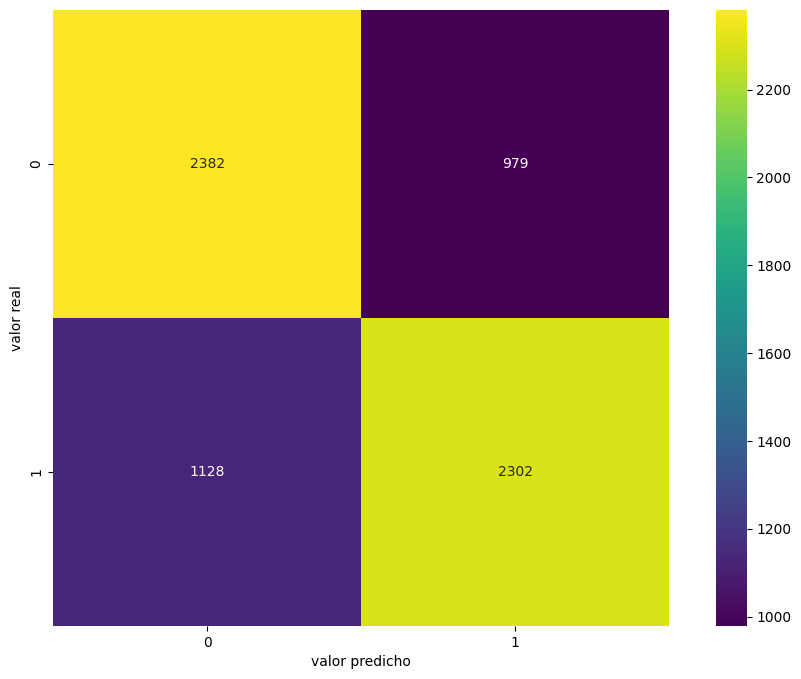

In [57]:
matriz_logistica = matriz_confusion(y_test, y_pred_lr_test, y_test.shape[0])
matriz_logistica

Matriz de confusión:

|            | No Acepta | Acepta |
|------------|------------|---------|
| No Acepta | VN         | FP :(     |
| Acepta    | FN :)        | VP      |

En este caso, queremos aumentar el número de valores de clientes predichos que no aceptan la oferta pero que en realidad aceptan la oferta (FN).

In [58]:
# vamos a hacernos una función
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [59]:
results_logistic = metricas(y_test, y_pred_lr_test, y_train, y_pred_lr_train, "Regresión logistica")
results_logistic

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.689736,0.701615,0.671137,0.686038,0.379685,test,Regresión logistica
1,0.686301,0.696022,0.658670,0.676831,0.372513,train,Regresión logistica


Mirando el kappa (como de azarosa ha sido la predicción según las variables predictoras pasadas), la regresión logística puntua por debajo del estándar necesario. El resto de variables no tienen malas méticas, pero descartamos este modelo por el valor bajo de la kappa.
<br>En este caso, tenemos que intentar aumentar el número de FN frente al de FP -- por tanto, la precision tiene que ser mayor al recall.
<br>Probaremos otros modelos a ver si mejoramos el resultado.

## Decision Tree Classifier

In [60]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

In [61]:
y_pred_test_dt_ = arbol.predict(X_test)
y_pred_train_dt_ = arbol.predict(X_train)

In [62]:
resultados_dt1 = metricas(y_test, y_pred_test_dt_, y_train, y_pred_train_dt_, "Decision Tree I")
resultados_dt1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.964659,1.0,0.930029,0.963746,0.929362,test,Decision Tree I
1,1.000000,1.0,1.000000,1.000000,1.000000,train,Decision Tree I


### selección de hiperparámetros

In [63]:
# max features

max_features = np.sqrt(len(X_train.columns))
max_features #tiraremoss hacia tres

4.47213595499958

In [64]:
# veamos cual es la profundidad de nuestro árbol
print(arbol.tree_.max_depth)

33


In [65]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param = {"max_depth": [1, 2, 3, 4, 5, 6,7,8,9,10],
         "min_samples_split": [25, 50, 75, 100, 150, 200, 250], #datos mínimos de los hijos
         "max_features": [1,2,3,4,5], 
         "min_samples_leaf": [25, 50, 75, 100, 150, 200, 250] #lo que necesita la madre para dividirse
         }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
arbol2 = GridSearchCV(
        estimator = DecisionTreeClassifier(), 
        param_grid = param, 
        n_jobs = -1, #todos los núcleos del ordenador
        verbose = 1,  #lista de mensajes
        cv = 10, #división de datos -- se repite 10 veces
        return_train_score = True, 
        scoring = "neg_mean_squared_error")

In [66]:
%%time
arbol2.fit(X_train, y_train)

Fitting 10 folds for each of 2450 candidates, totalling 24500 fits
CPU times: user 8.95 s, sys: 4.69 s, total: 13.6 s
Wall time: 1min 21s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [25, 50, 75, 100, 150, 200, 250],
                         'min_samples_split': [25, 50, 75, 100, 150, 200, 250]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [67]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
arbol2.best_params_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------


{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 25,
 'min_samples_split': 50}

In [68]:
arbol3 = DecisionTreeClassifier( max_depth =  10, 
                                max_features=5, 
                                min_samples_split=25, 
                                min_samples_leaf=50)
arbol3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, max_features=5, min_samples_leaf=50,
                       min_samples_split=25)

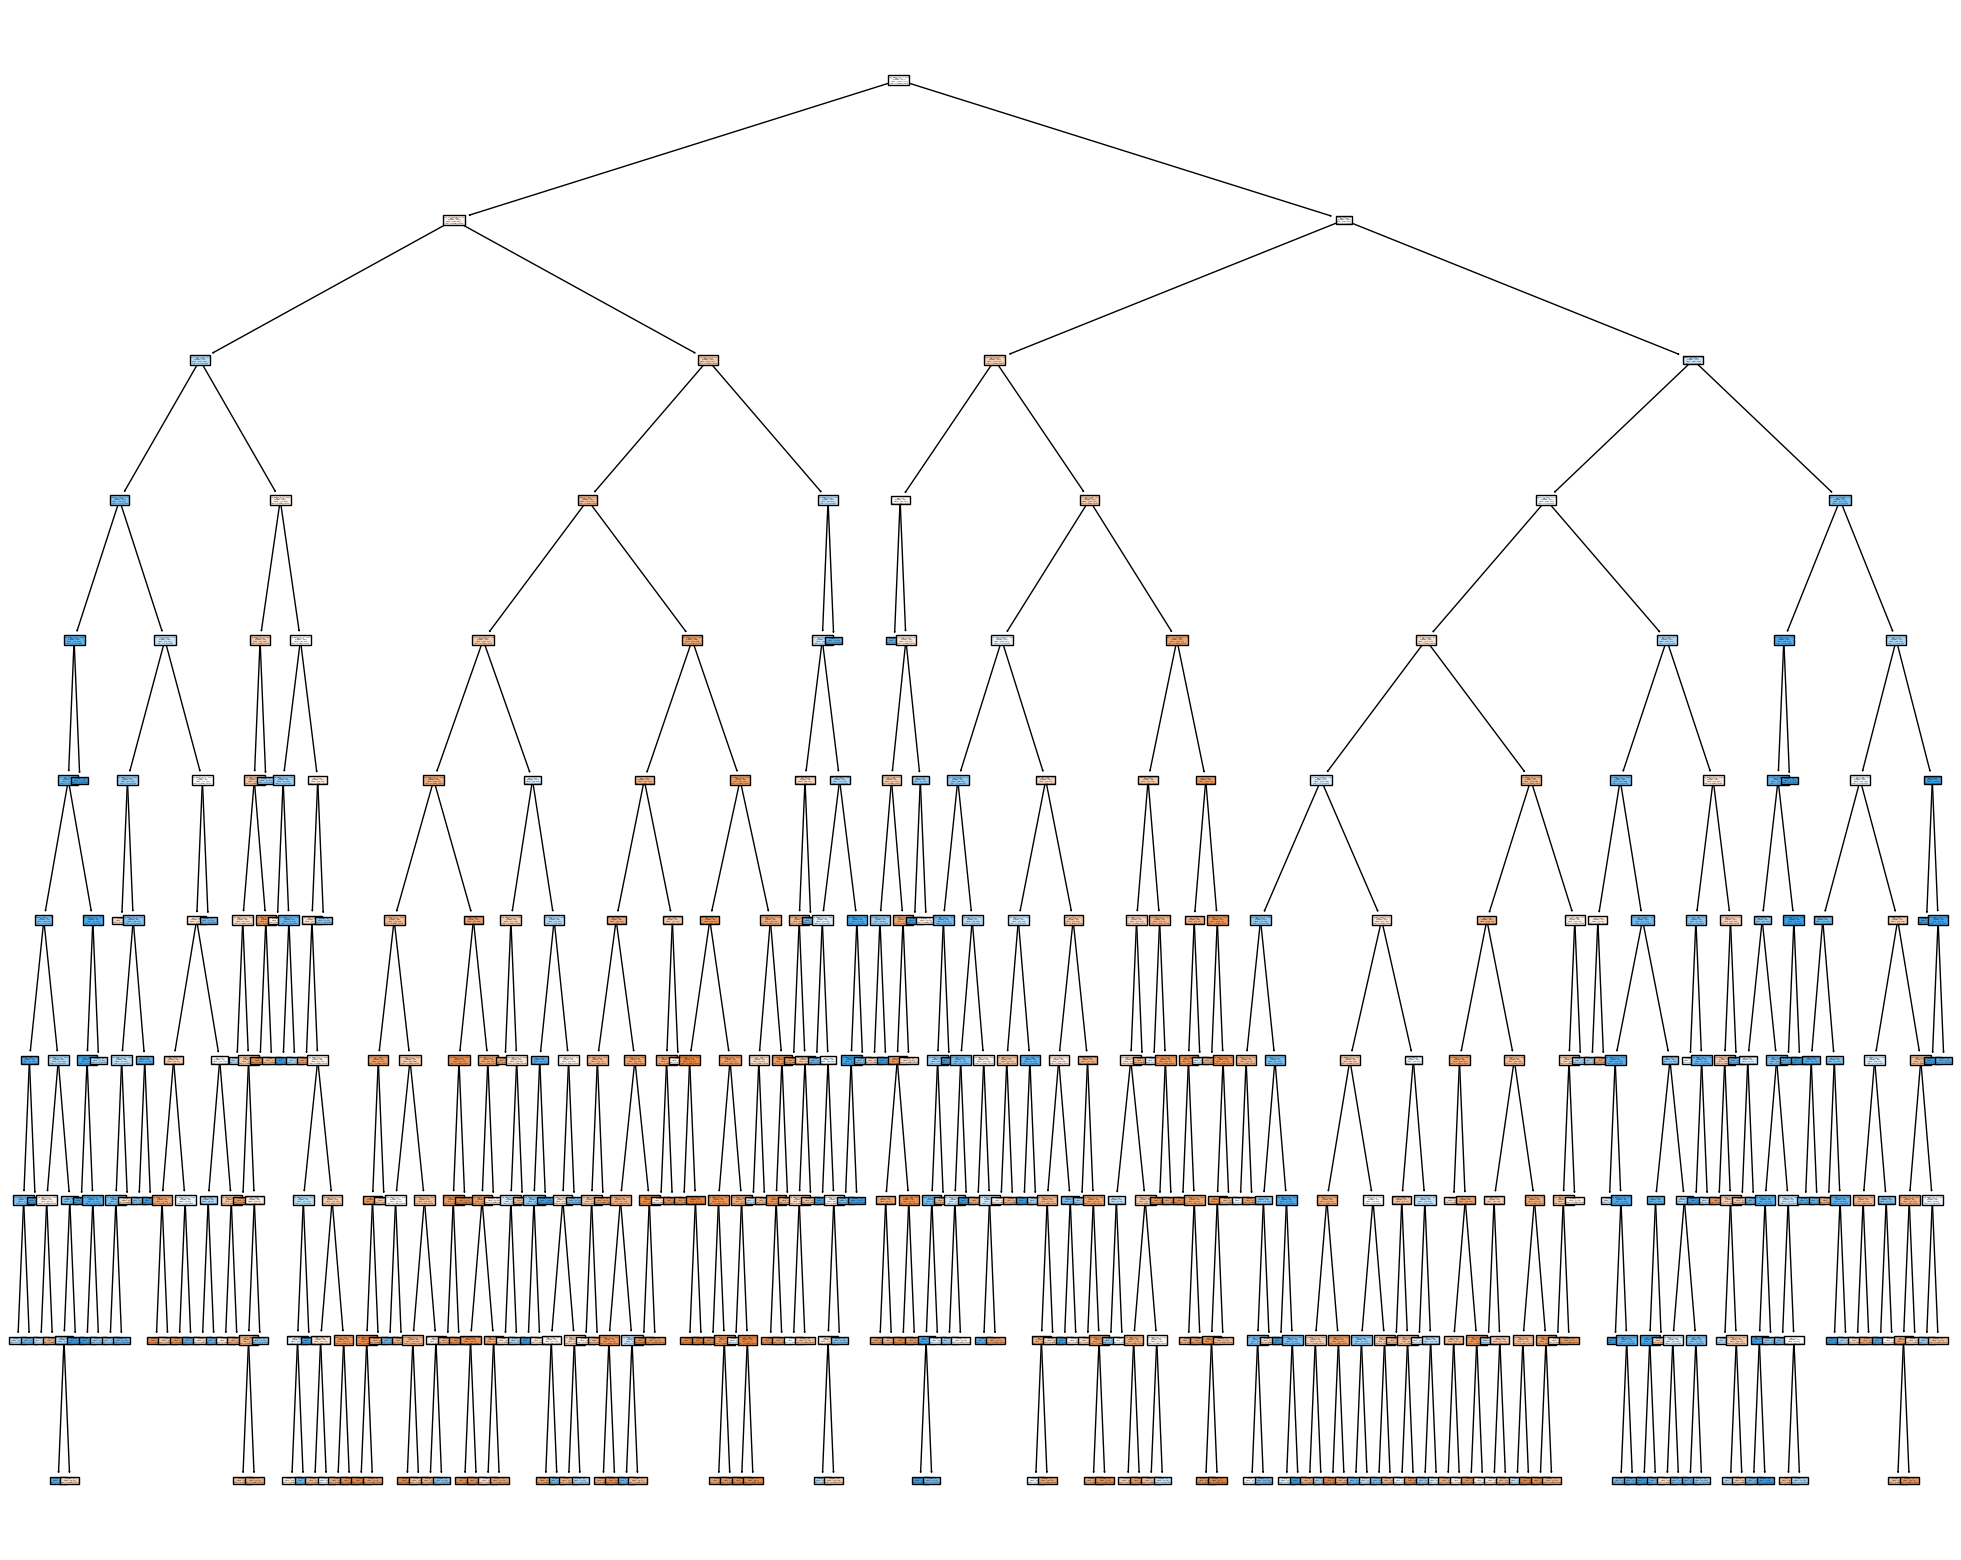

In [69]:
# Ahora vamos a plotear el resultado del modelo en un árbol
fig = plt.figure(figsize=(25,20))
tree.plot_tree(arbol3,
                   feature_names=X.columns,
                   class_names=['No Heart_Disease', "Heart_Disease"],
                   filled=True)
plt.show()

In [70]:
# hacemos las predicciones para el train y el test
y_pred_arbol_test= arbol3.predict(X_test)
y_pred_arbol_train= arbol3.predict(X_train)

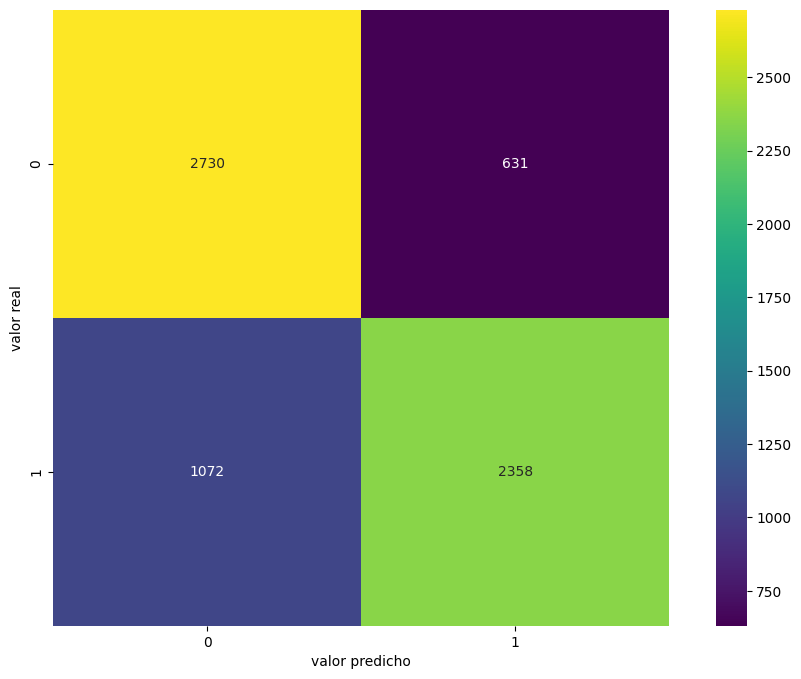

In [71]:
matriz_arbol = matriz_confusion(y_test, y_pred_arbol_test, y_test.shape[0])
matriz_arbol

In [74]:
df['Offer_Accepted'].value_counts()

No     16977
Yes     1023
Name: Offer_Accepted, dtype: int64

In [72]:
results_decission_tree2 =  metricas(y_test, y_pred_arbol_test, y_train, y_pred_arbol_train, "Decission Tree II")
results_decission_tree2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.749227,0.788893,0.687464,0.734694,0.499063,test,Decission Tree II
1,0.765269,0.801075,0.704215,0.749529,0.530391,train,Decission Tree II


In [73]:
# juntamos los resultados con los del modelo anterior
df_all_results = pd.concat([results_logistic, results_decission_tree2], axis = 0)
df_all_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.689736,0.701615,0.671137,0.686038,0.379685,test,Regresión logistica
1,0.686301,0.696022,0.658670,0.676831,0.372513,train,Regresión logistica
0,0.749227,0.788893,0.687464,0.734694,0.499063,test,Decission Tree II
1,0.765269,0.801075,0.704215,0.749529,0.530391,train,Decission Tree II


Tanto la regresión logística como el Decission tree tienen un valor de kappa muy bajo -- parece que las variables que se tienen en cuenta no son suficientes para poder predecir el resultado. Como no podemos obtener más variables para hacer la predicción, continuaremos probando otro modelo.
<br>El accuracy mejora en el Decission Tree frente a la regresión logística, junto con el recall, la precision y el f1.
<br>Lo ideal sería que la precision es menor que el recall, por lo que cumple que se reduce el número de FP.

## Random Forest

In [75]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param = param

# Búsqueda por grid search con validación cruzada (cross-validarion)
# ==============================================================================
random_forest = GridSearchCV(
        estimator = RandomForestClassifier(), 
        param_grid = param, 
        n_jobs = -1,
        verbose = 1,  
        cv = 10, 
        return_train_score = True, 
        scoring = "neg_mean_squared_error")

In [76]:
%%time
random_forest.fit(X_train, y_train)

Fitting 10 folds for each of 2450 candidates, totalling 24500 fits
CPU times: user 1min 1s, sys: 30.5 s, total: 1min 32s
Wall time: 2h 18min 55s


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [25, 50, 75, 100, 150, 200, 250],
                         'min_samples_split': [25, 50, 75, 100, 150, 200, 250]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [77]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")

random_forest.best_params_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------


{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 25,
 'min_samples_split': 50}

In [78]:
# creamos el modelo con los mejores parámetros para hacer las predicciones
clf=RandomForestClassifier(min_samples_split= 50,
                           min_samples_leaf=25,
                           max_features=5,
                           max_depth=10)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=25,
                       min_samples_split=50)

In [79]:
y_pred_clf_test= clf.predict(X_test)
y_pred_clf_train= clf.predict(X_train)

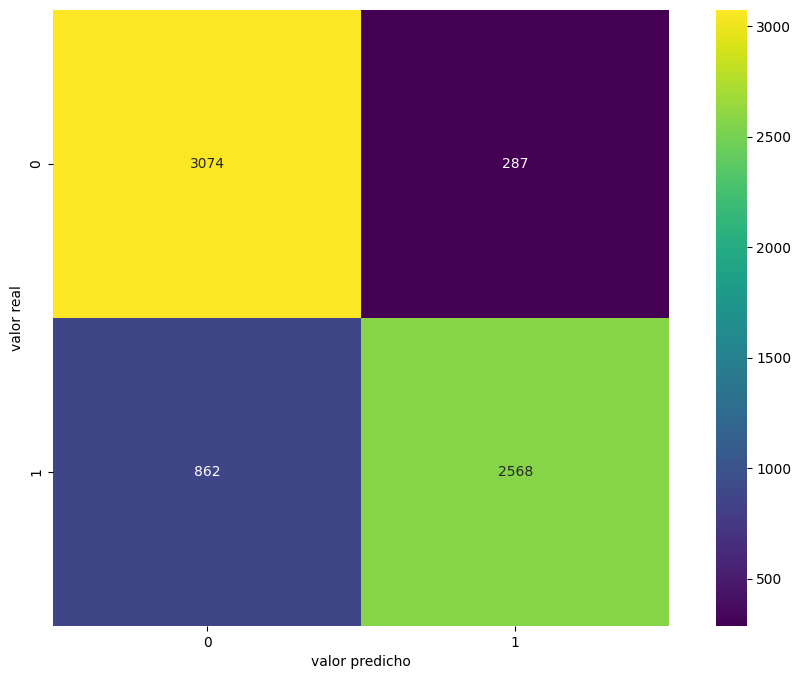

In [80]:
matriz_random = matriz_confusion(y_test, y_pred_clf_test, y_test.shape[0])
matriz_random

In [81]:
results_forest = metricas(y_test, y_pred_clf_test, y_train, y_pred_clf_train, "Random Forest")
df_all_results = pd.concat([df_all_results, results_forest], axis = 0)
df_all_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.689736,0.701615,0.671137,0.686038,0.379685,test,Regresión logistica
1,0.686301,0.696022,0.658670,0.676831,0.372513,train,Regresión logistica
0,0.749227,0.788893,0.687464,0.734694,0.499063,test,Decission Tree II
1,0.765269,0.801075,0.704215,0.749529,0.530391,train,Decission Tree II
0,0.830805,0.899475,0.748688,0.817184,0.662157,test,Random Forest
1,0.848986,0.915823,0.767771,0.835288,0.697846,train,Random Forest


Con el Random Forest hemos mejorado de forma muy significativa el valor de kappa (como de azarosa es la predicción según las variables que les pasamos al modelo), ahora estaría dentro de los valores aceptables.
<br>El accuracy mejora también, junto con la precision, el recall y el f1. Por ahora este modelo es el que más se ajusta a lo que buscamos, pero probaremos el GradientBooster para ver si mejora los resultados.
<br>La precision sería considerabemente menor que el recall, por lo que parece que estamos mejorando los resultados.

## GradientBooster

In [82]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param = param

# Búsqueda por grid search con validación cruzada
# ==============================================================================
gradient = GridSearchCV(
        estimator  = GradientBoostingClassifier(),
        param_grid = param,
        n_jobs     = -1,
        verbose    = 1,
        cv         = 10, 
        return_train_score = True
       )

gradient.fit(X = X_train, y = y_train)

Fitting 10 folds for each of 2450 candidates, totalling 24500 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [25, 50, 75, 100, 150, 200, 250],
                         'min_samples_split': [25, 50, 75, 100, 150, 200, 250]},
             return_train_score=True, verbose=1)

In [83]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(gradient.best_params_)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 25, 'min_samples_split': 25}


In [84]:
# Create the gradient boosting classifier with some hyperparameters
gb_clf = GradientBoostingClassifier(min_samples_split= 25,
                           min_samples_leaf=25,
                           max_features=4,
                           max_depth=10)
# Train the model on the training data
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, max_features=4, min_samples_leaf=25,
                           min_samples_split=25)

In [85]:
y_pred_gb_test= gb_clf.predict(X_test)
y_pred_gb_train= gb_clf.predict(X_train)

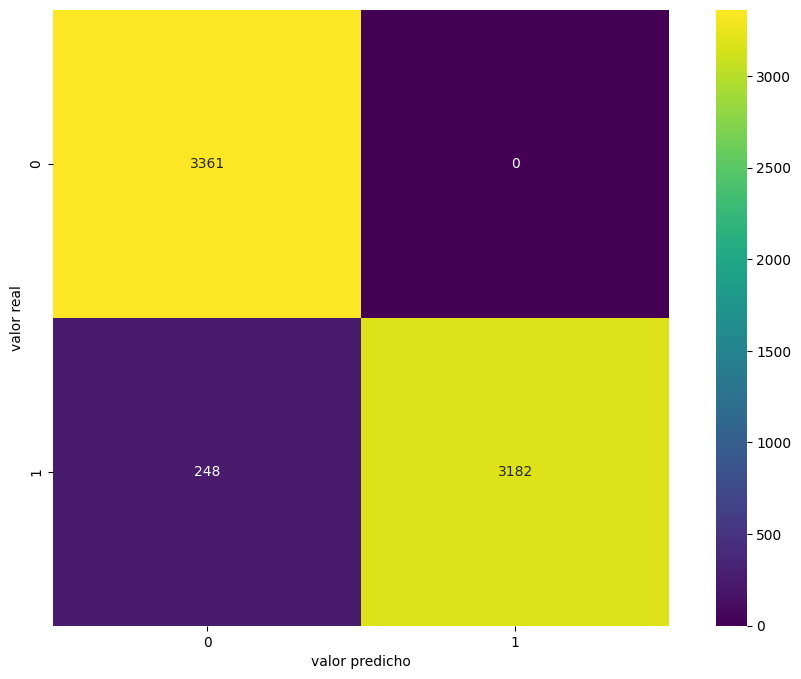

In [86]:
matriz_gradient = matriz_confusion(y_test, y_pred_gb_test, y_test.shape[0])
matriz_gradient

In [87]:
results_gradient = metricas(y_test, y_pred_gb_test, y_train, y_pred_gb_train, "Gradient")
df_all_results = pd.concat([df_all_results, results_gradient], axis = 0)
df_all_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.689736,0.701615,0.671137,0.686038,0.379685,test,Regresión logistica
1,0.686301,0.696022,0.658670,0.676831,0.372513,train,Regresión logistica
0,0.749227,0.788893,0.687464,0.734694,0.499063,test,Decission Tree II
1,0.765269,0.801075,0.704215,0.749529,0.530391,train,Decission Tree II
0,0.830805,0.899475,0.748688,0.817184,0.662157,test,Random Forest
1,0.848986,0.915823,0.767771,0.835288,0.697846,train,Random Forest
0,0.963481,1.000000,0.927697,0.962492,0.927009,test,Gradient
1,0.985458,1.000000,0.970842,0.985205,0.970914,train,Gradient


El Gradient es el modelo con el que mejores métricas hemos obtenido, el kappa es el mayor que hemos obtenido con cualquier otro modelo.
<br>El accuracy mejora también significativamente. Sin embargo, la precision y en el recall puede ser que tengamos overfitting; la precision tiene un valor de 1 porque no hay FN y la distancia entre el train y el test es bastante grande.
<br>La precision sería considerabemente menor que el recall, por lo que parece que estamos mejorando los resultados. Sin embargo, este modelo aunque sea el que mejor puntúa parece que está overfitteado.

## KNeighborsClassifier

sacamos el número de vecinos

In [88]:
knn_scores = []

for k in range(1,21):
    # por defecto nos devuelve la precisión
    score = cross_val_score(KNeighborsClassifier(n_neighbors = k),
                          X = X,
                          y = y,
                          cv=10, 
                         scoring = "precision")
    knn_scores.append(score.mean())

In [89]:
knn = pd.DataFrame(knn_scores, range(1,21)).reset_index()
knn.columns = ["number_neighbors", "score"]
knn.sort_values(by = "score", ascending = False).head(3)

,number_neighbors,score
0,1,1.0
1,2,1.0
2,3,1.0


In [90]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [91]:
y_pred_knn_test = knn.predict(X_test)
y_pred_knn_train = knn.predict(X_train)

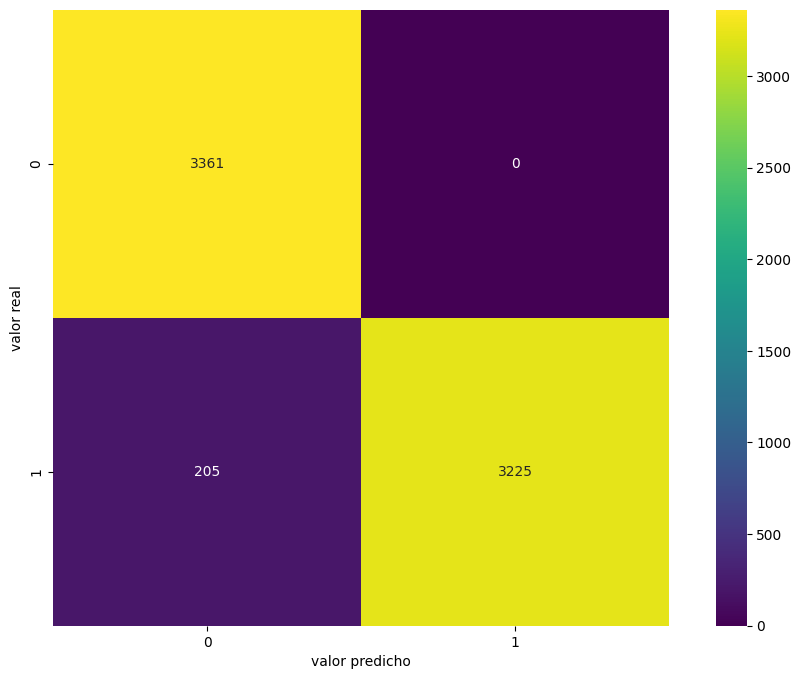

In [92]:
matriz_knn = matriz_confusion(y_test, y_pred_knn_test, y_test.shape[0])
matriz_knn

In [93]:
results_knn = metricas(y_test, y_pred_knn_test, y_train, y_pred_knn_train, "KNN")
df_all_results = pd.concat([df_all_results, results_knn])
df_all_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.689736,0.701615,0.671137,0.686038,0.379685,test,Regresión logistica
1,0.686301,0.696022,0.658670,0.676831,0.372513,train,Regresión logistica
0,0.749227,0.788893,0.687464,0.734694,0.499063,test,Decission Tree II
1,0.765269,0.801075,0.704215,0.749529,0.530391,train,Decission Tree II
0,0.830805,0.899475,0.748688,0.817184,0.662157,test,Random Forest
1,0.848986,0.915823,0.767771,0.835288,0.697846,train,Random Forest
0,0.963481,1.000000,0.927697,0.962492,0.927009,test,Gradient
1,0.985458,1.000000,0.970842,0.985205,0.970914,train,Gradient
0,0.969813,1.000000,0.940233,0.969196,0.939657,test,KNN
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,KNN


Este modelo si que tiene claramente overfitting -- el train puntúa demasiado bien y el test tiene valores demasiado altos.
<br>En este caso, el modelo que mejor puntúa es el Random Forest -- El gradient y el KNN parecen estar overfitteados.